In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score

from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import ElasticNetCV, LogisticRegression

from sklearn import datasets

In [3]:
df = pd.read_csv("assets/data/main_dataset.csv")
df.shape

(60, 13)

In [4]:
df.head()

,movie,box,pop_rating,pop_trailer,pop_review,budget,critic_rt,critic_ms,public_rt,public_imdb,opinion_pos,opinion_neg,year
0,Call Me by Your Name,41,239,20297,1.100,4.52,94,93,86,7.9,198,10.0,2017
1,Darkest Hour,150,187,9019,0.670,30.00,84,75,82,7.4,94,2.7,2017
2,Dunkirk,527,600,45932,2.500,100.00,92,94,81,7.8,317,10.0,2017
3,Get Out,255,534,20403,1.700,4.50,98,85,86,7.7,107,8.4,2017
4,Lady Bird,79,263,19288,0.849,10.00,99,94,79,7.4,140,3.4,2017


In [5]:
df.dtypes

movie           object
box              int64
pop_rating       int64
pop_trailer      int64
pop_review     float64
budget         float64
critic_rt        int64
critic_ms        int64
public_rt        int64
public_imdb    float64
opinion_pos      int64
opinion_neg    float64
year             int64
dtype: object

array([[<AxesSubplot:title={'center':'ratio'}>]], dtype=object)

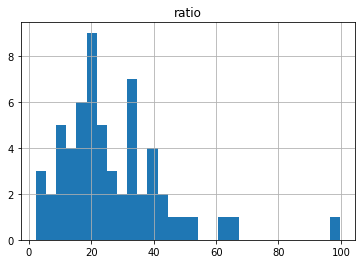

In [6]:
df["ratio"] = (df["opinion_pos"] / df["opinion_neg"])

df.hist(column="ratio", bins=30)

In [20]:
def convert_box(ratio):
    if ratio < 5:
        return 1
    elif ratio < 10:
        return 2
    elif ratio < 15:
        return 3
    else:
        return 4
    

In [21]:
df["roi"] = (df["box"] / df["budget"]).apply(convert_box)

array([[<AxesSubplot:title={'center':'roi'}>]], dtype=object)

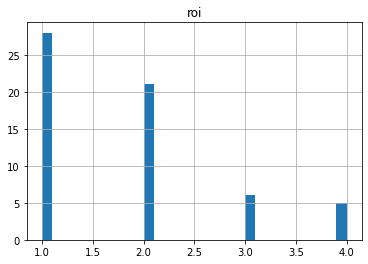

In [22]:
df.hist(column="roi", bins=30)

In [9]:
df.columns

Index(['movie', 'box', 'pop_rating', 'pop_trailer', 'pop_review', 'budget',
       'critic_rt', 'critic_ms', 'public_rt', 'public_imdb', 'opinion_pos',
       'opinion_neg', 'year', 'ratio'],
      dtype='object')

In [96]:
# cols = ['box', 'pop_rating', 'pop_trailer', 'pop_review', 'budget',
#        'critic_rt', 'critic_ms', 'public_rt', 'public_imdb', 'ratio']

cols = ['pop_rating',
       'critic_ms', 'public_imdb', 'ratio']

In [104]:
# X = df.iloc[:, 2:10]
X = df[cols]
y = df.iloc[:, 1]
# y = df['roi']

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=111)
y.head()

0     41
1    150
2    527
3    255
4     79
Name: box, dtype: int64

In [105]:
# estimator = KNeighborsClassifier()
# param = [{'n_neighbors': [1, 2, 3, 4, 5, 6]}]

estimator = SVC()
param = [{'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]}]


gscv = GridSearchCV(
    estimator = estimator,
    param_grid = param,
    cv = 4,
    scoring = 'accuracy'
)

gscv.fit(X_train.values, y_train.values)

ValueError: n_splits=4 cannot be greater than the number of members in each class.

In [116]:
pipe = make_pipeline(
    # StandardScaler(),
    # MultinomialNB()
    # GaussianNB()
    ComplementNB()
    # DecisionTreeClassifier()
    # NearestCentroid()
    # KNeighborsRegressor()
    # ElasticNetCV()
    # SVC()
    # SVR()
    # LogisticRegression()
    # KNeighborsClassifier(n_neighbors=5)
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('complementnb', ComplementNB())])

In [102]:
accuracy_score(gscv.predict(X_test.values), y_test.values)

0.4166666666666667

In [117]:
result = pipe.predict(X_test)

pd.DataFrame(
    {
        "Ture": y_test,
        "Predict": result
    }
)

,Ture,Predict
52,1450,48
30,853,1074
17,786,1074
16,341,1074
0,41,48
25,23,79
29,2798,1074
53,53,48
50,1128,1074
23,217,48
